In [1]:
%matplotlib inline

from ROOT import TFile
from ROOT import TCanvas, TLegend
from ROOT import gDirectory, gStyle

inputSignal = TFile.Open("./mc_345060.ggH125_ZZ4lep.4lep.root")
inputBG1 = TFile.Open("./mc_363490.llll.4lep.root")
inputBG2 = TFile.Open("./mc_345337.ZH125J_llWW2lep.4lep.root")

signal = inputSignal.Get("mini")
bg1 = inputBG1.Get("mini")
bg2 = inputBG2.Get("mini")


# print the available features 
print(signal.Print())

Welcome to JupyROOT 6.24/06
******************************************************************************
*Tree    :mini      : mini                                                   *
*Entries :   164716 : Total =       181691402 bytes  File  Size =   50512293 *
*        :          : Tree compression factor =   3.60                       *
******************************************************************************
None
*Br    0 :runNumber : runNumber/I                                            *
*Entries :   164716 : Total  Size=     659517 bytes  File Size  =       3423 *
*Baskets :        2 : Basket Size=    1564672 bytes  Compression= 192.53     *
*............................................................................*
*Br    1 :eventNumber : eventNumber/I                                        *
*Entries :   164716 : Total  Size=     659529 bytes  File Size  =     410222 *
*Baskets :        2 : Basket Size=    1564672 bytes  Compression=   1.61     *
*..................

*Entries :   164716 : Total  Size=    2966527 bytes  File Size  =     440411 *
*Baskets :        2 : Basket Size=    2400768 bytes  Compression=   6.73     *
*............................................................................*
*Br   26 :lep_ptcone30 : vector<float>                                       *
*Entries :   164716 : Total  Size=    4946026 bytes  File Size  =    1034992 *
*Baskets :        3 : Basket Size=    2400768 bytes  Compression=   4.78     *
*............................................................................*
*Br   27 :lep_etcone20 : vector<float>                                       *
*Entries :   164716 : Total  Size=    4946026 bytes  File Size  =    2935323 *
*Baskets :        3 : Basket Size=    2400768 bytes  Compression=   1.68     *
*............................................................................*
*Br   28 :lep_trackd0pvunbiased : vector<float>                              *
*Entries :   164716 : Total  Size=    4946089 bytes 

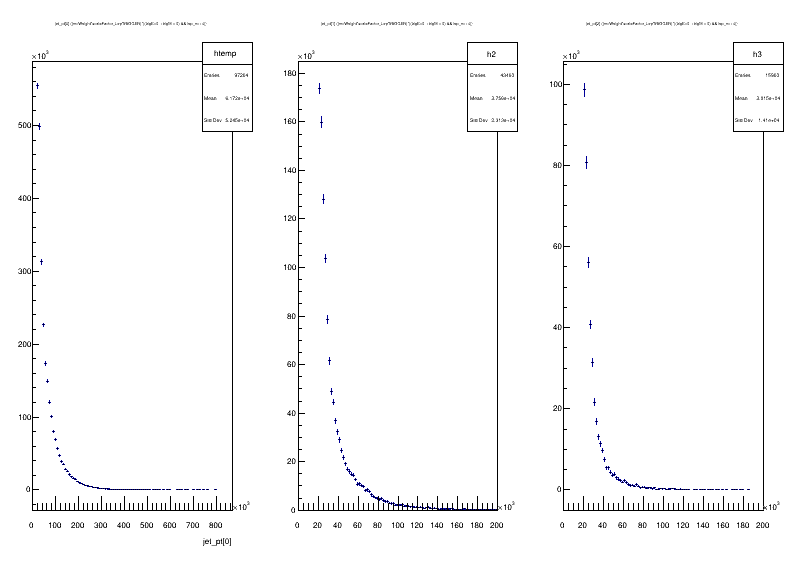

In [2]:
# plot three histograms next to each other
# syntax: sample.Draw("variable>>HistoName(nBins,xLow,xUp)")
# sample = signal, bg1 or bg2
# variable = anything that is printed out above (note: mathematical fomulas, e.g. X*Y, can be used as well)
# variables that are vectors can be accessed with var[i] for i-th element
# the ">>HistoName(nBins,xLow,xUp)" is optional; don't define anything to show all events and full range
canvas = TCanvas("Canvas","Canvas",800,600)
canvas.Divide(3,1)
canvas.cd(1)
signal.Draw("jet_pt[0]","(mcWeight*scaleFactor_LepTRIGGER)*((trigE>0 || trigM > 0) && lep_n>=4)")
canvas.cd(2)
signal.Draw("jet_pt[1]>>h2(100,0,200e3)","(mcWeight*scaleFactor_LepTRIGGER)*((trigE>0 || trigM > 0) && lep_n>=4)")
canvas.cd(3)
signal.Draw("jet_pt[2]>>h3(100,0,200e3)","(mcWeight*scaleFactor_LepTRIGGER)*((trigE>0 || trigM > 0) && lep_n>=4)")
canvas.Draw()

# draw with weights w1, w2 and selections sel1>x, sel2<y like
# sample.Draw("variable>>HistoName(nBins,xLow,xUp)", "(w1*w2)*(sel1>x && sel2<y)")
# note: variables used as weights and selection must be in the tree

Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used


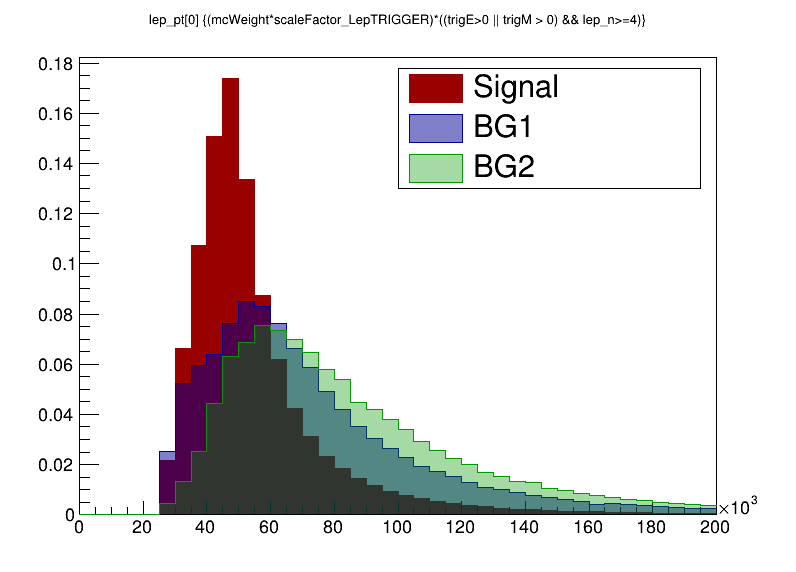

In [3]:
# compare three histograms
canvas2 = TCanvas("Canvas2","Canva2",800,600)

canvas2.cd()
signal.Draw("lep_pt[0]>>hsig(40,0,200e3)","(mcWeight*scaleFactor_LepTRIGGER)*((trigE>0 || trigM > 0) && lep_n>=4)")
bg1.Draw("lep_pt[0]>>hbg1(40,0,200e3)","(mcWeight*scaleFactor_LepTRIGGER)*((trigE>0 || trigM > 0) && lep_n>=4)")
bg2.Draw("lep_pt[0]>>hbg2(40,0,200e3)","(mcWeight*scaleFactor_LepTRIGGER)*((trigE>0 || trigM > 0) && lep_n>=4)")
h_sig = gDirectory.Get("hsig")
h_bg1 = gDirectory.Get("hbg1")
h_bg2 = gDirectory.Get("hbg2")

h_sig.Scale(1/h_sig.Integral())
h_bg1.Scale(1/h_bg1.Integral())
h_bg2.Scale(1/h_bg2.Integral())

h_sig.SetLineColor(634)
h_sig.SetFillColor(634)
h_bg1.SetLineColor(602)
h_bg1.SetFillColorAlpha(602,0.5)
h_bg2.SetLineColor(418)
h_bg2.SetFillColorAlpha(418,0.35)


h_sig.Draw("HIST")
h_bg1.Draw("HISTsame")
h_bg2.Draw("HISTsame")

legend = TLegend(0.6,0.9,0.6,0.9)
legend.AddEntry(h_sig,"Signal","f")
legend.AddEntry(h_bg1,"BG1","f")
legend.AddEntry(h_bg2,"BG2","f")
legend.Draw()
    
gStyle.SetOptStat(00000)
canvas2.Draw()

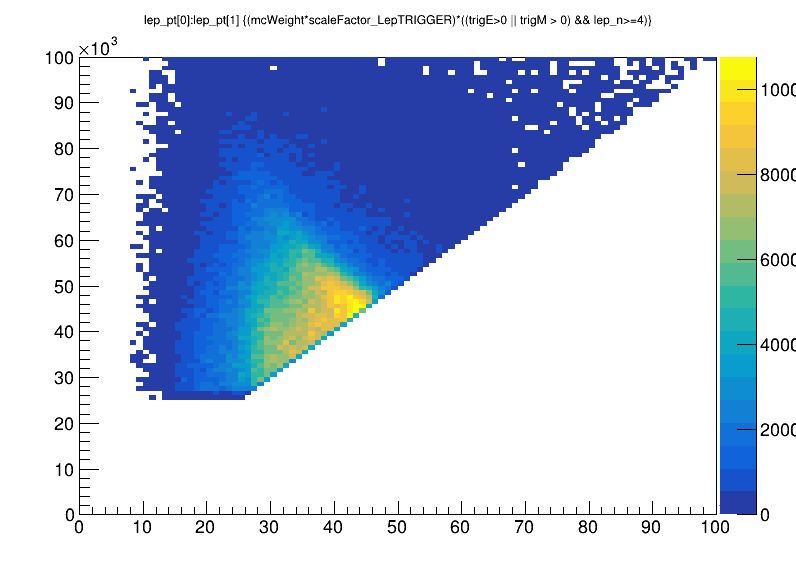

In [4]:
# 2D plots
canvas3 = TCanvas("Canvas3","Canvas3",800,600)
signal.Draw("lep_pt[0]:lep_pt[1]>>histo(100,0,100e3,100,0,100e3)",
            "(mcWeight*scaleFactor_LepTRIGGER)*((trigE>0 || trigM > 0) && lep_n>=4)", "colz")

canvas3.Draw()